In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

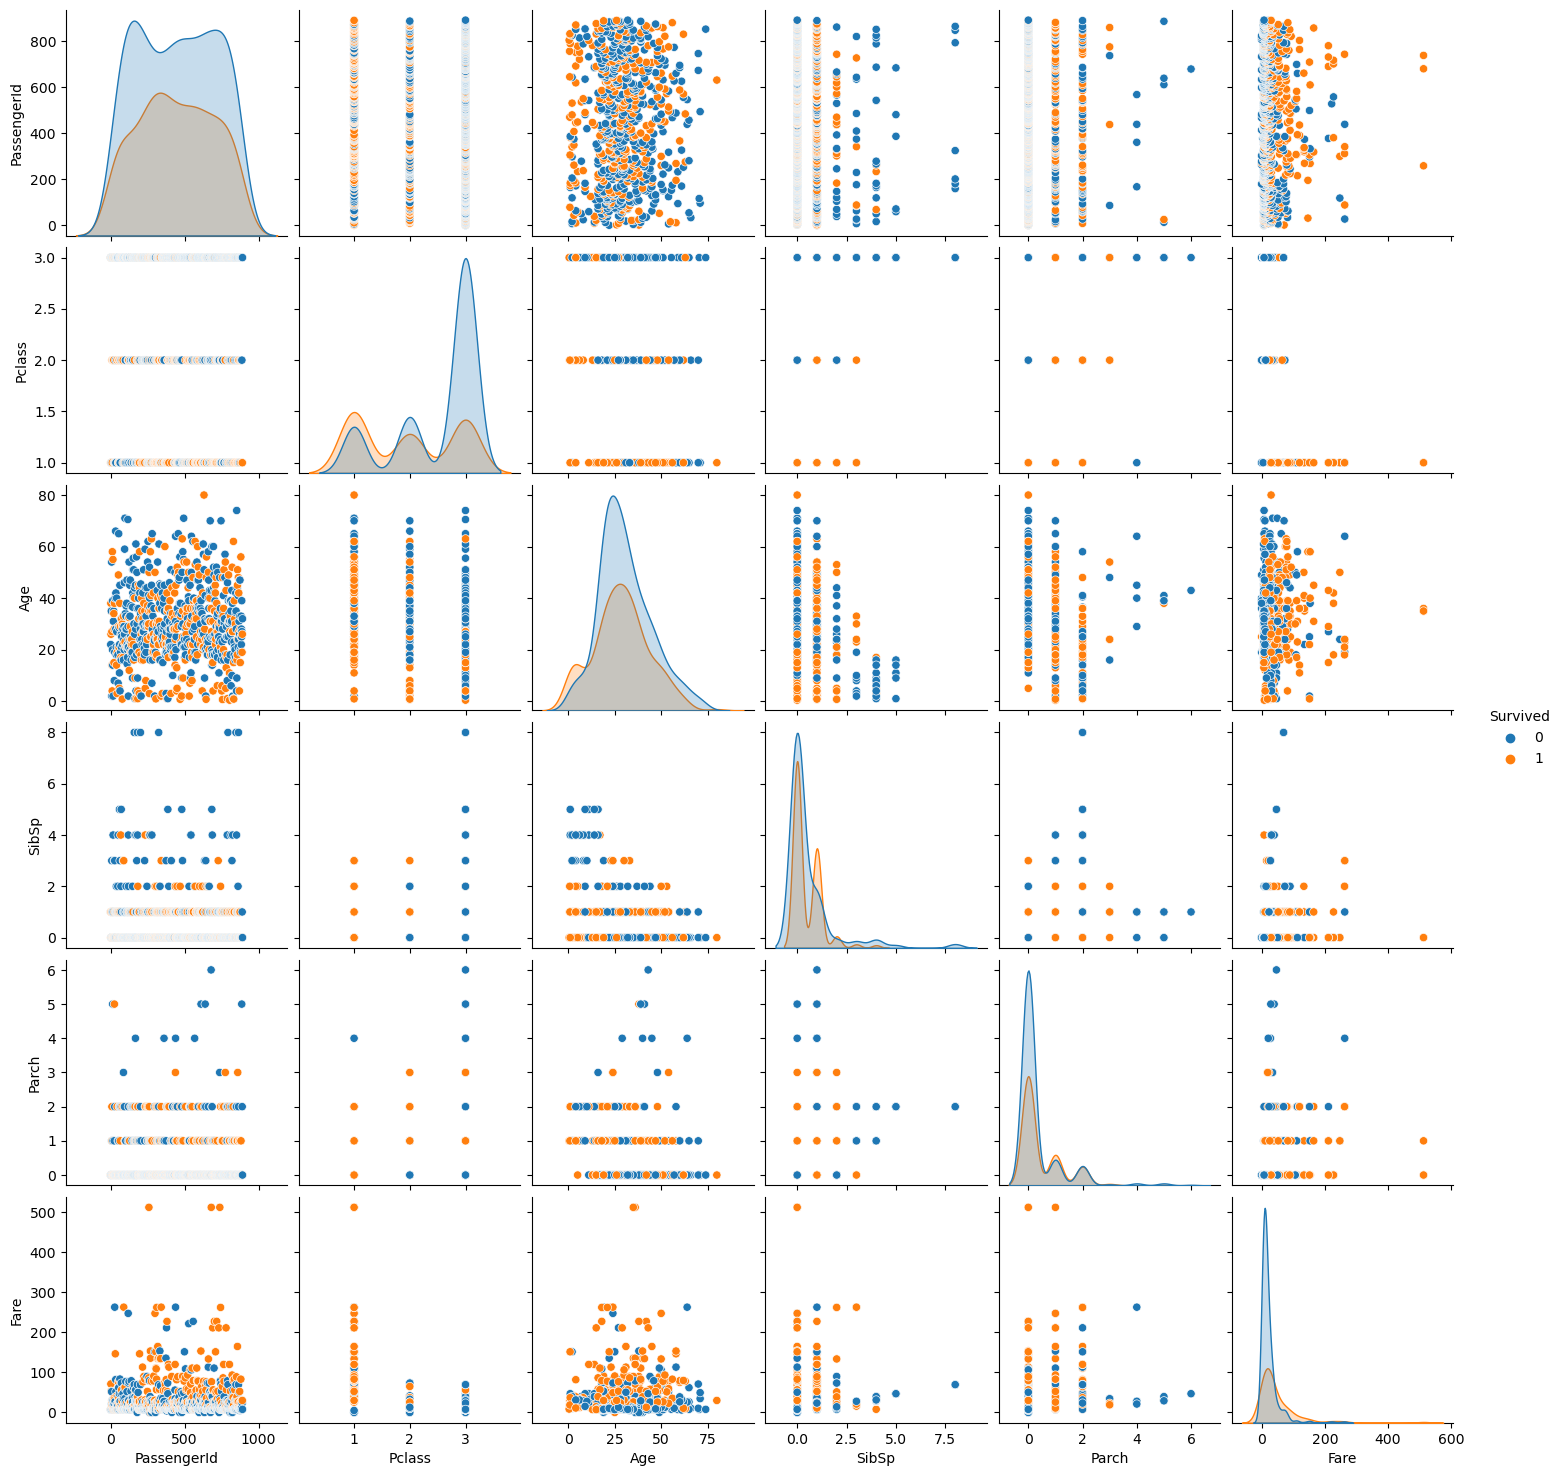

In [5]:
sns.pairplot(df,hue='Survived')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.drop(['PassengerId','Name','SibSp','Ticket','Cabin','Parch'],axis=1,inplace=True)

In [8]:
df

Survived  Pclass     Sex   Age     Fare Embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
886         0       2    male  27.0  13.0000        S
887         1       1  female  19.0  30.0000        S
888         0       3  female   NaN  23.4500        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[891 rows x 6 columns]

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.duplicated().sum()

125

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

Survived  Pclass     Sex   Age     Fare Embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
885         0       3  female  39.0  29.1250        Q
887         1       1  female  19.0  30.0000        S
888         0       3  female  28.0  23.4500        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[766 rows x 6 columns]

In [15]:
df = pd.get_dummies(df,drop_first=True)
df

Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S
0           0       3  22.0   7.2500         1           0           1
1           1       1  38.0  71.2833         0           0           0
2           1       3  26.0   7.9250         0           0           1
3           1       1  35.0  53.1000         0           0           1
4           0       3  35.0   8.0500         1           0           1
..        ...     ...   ...      ...       ...         ...         ...
885         0       3  39.0  29.1250         0           1           0
887         1       1  19.0  30.0000         0           0           1
888         0       3  28.0  23.4500         0           0           1
889         1       1  26.0  30.0000         1           0           0
890         0       3  32.0   7.7500         1           1           0

[766 rows x 7 columns]

In [16]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [18]:
X_train

Pclass    Age      Fare  Sex_male  Embarked_Q  Embarked_S
680       3  28.00    8.1375         0           1           0
467       1  56.00   26.5500         1           0           1
341       1  24.00  263.0000         0           0           1
657       3  32.00   15.5000         0           1           0
506       2  33.00   26.0000         0           0           1
..      ...    ...       ...       ...         ...         ...
469       3   0.75   19.2583         0           0           0
130       3  33.00    7.8958         1           0           0
406       3  51.00    7.7500         1           0           1
49        3  18.00   17.8000         0           0           1
226       2  19.00   10.5000         1           0           1

[612 rows x 6 columns]

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train,y_train)
ypred_train = dt_default.predict(X_train)
ypred_test = dt_default.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross validation Score:',cross_val_score(dt_default,X,y,cv=5).mean())

Training Accuracy: 0.9803921568627451
Test Accuracy: 0.7142857142857143
Cross validation Score: 0.7403276462099991


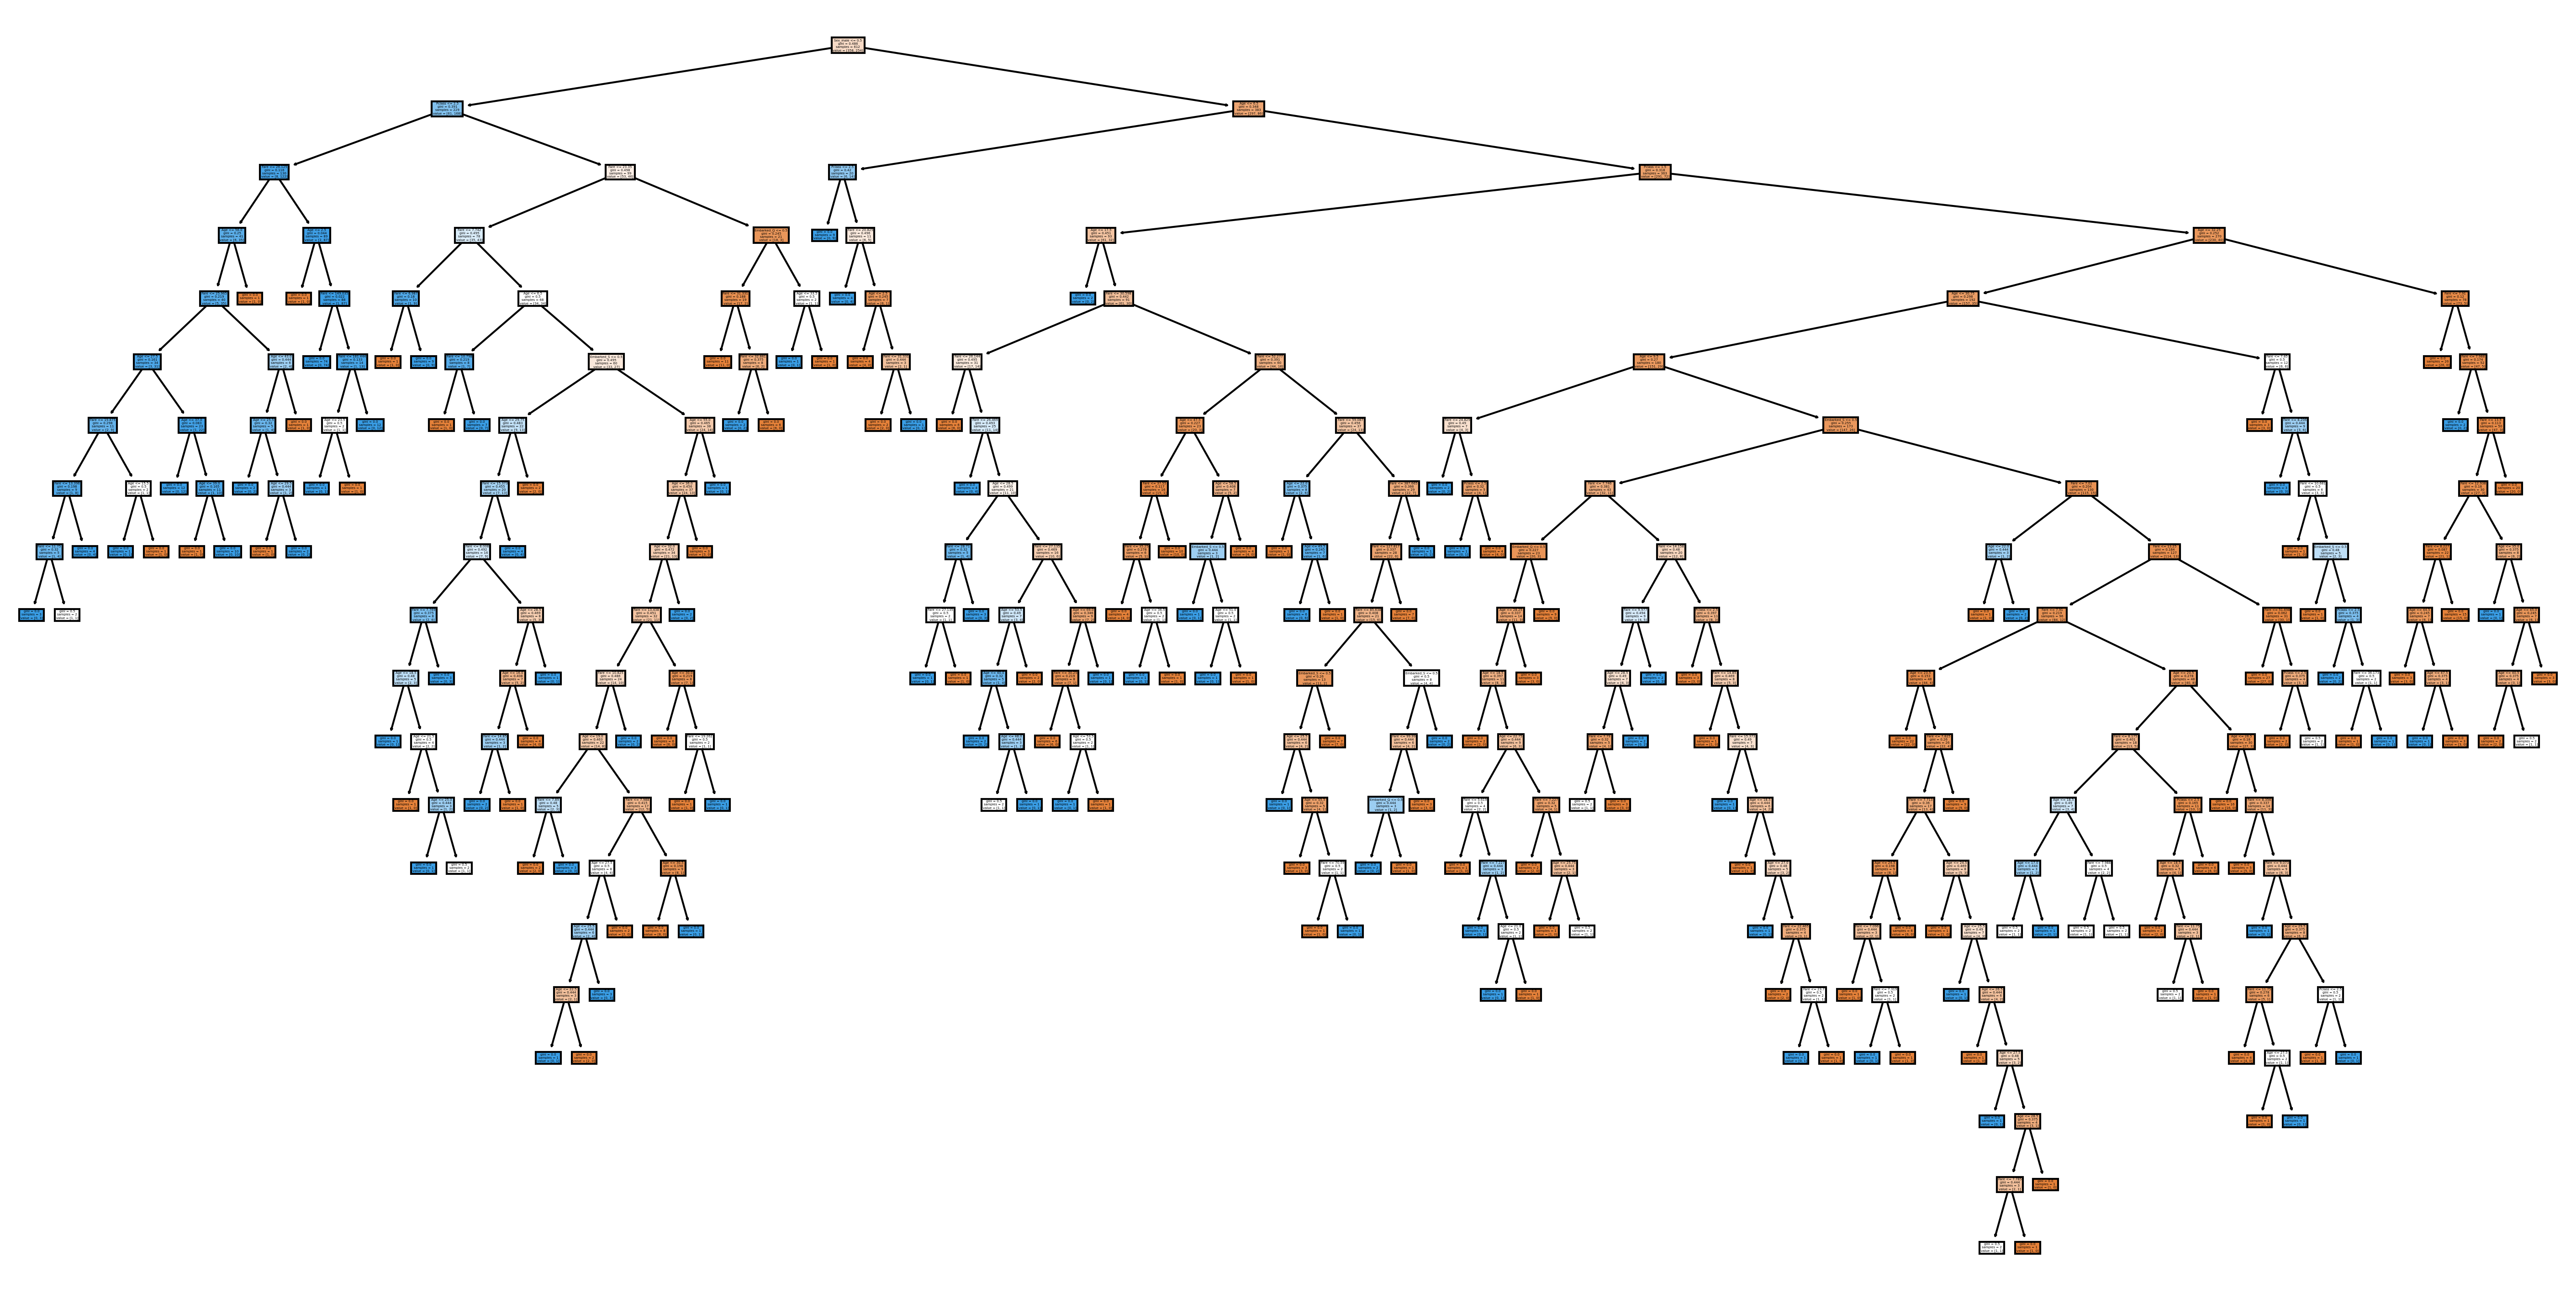

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)
plot_tree(dt_default,filled=True,feature_names=X.columns)
plt.show()

In [21]:
dt_default.feature_importances_
pd.DataFrame(index=X.columns,data=dt_default.feature_importances_,columns = ['Feature Importance'])

Feature Importance
Pclass                0.132987
Age                   0.276089
Fare                  0.301191
Sex_male              0.260491
Embarked_Q            0.008417
Embarked_S            0.020825

In [22]:
from sklearn.model_selection import GridSearchCV 
#model
estimator = DecisionTreeClassifier(random_state=0)

# Parameters (which you want to tune and identify the best)
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': list(range(1,20))}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [23]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [24]:
X = X.drop(['Embarked_Q','Embarked_S'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
model1.fit(X_train,y_train)
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross validation Score:',cross_val_score(model1,X,y,cv=5).mean())

Training Accuracy: 0.8545751633986928
Test Accuracy: 0.7727272727272727
Cross validation Score: 0.7859519565401918


In [25]:
df

Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S
0           0       3  22.0   7.2500         1           0           1
1           1       1  38.0  71.2833         0           0           0
2           1       3  26.0   7.9250         0           0           1
3           1       1  35.0  53.1000         0           0           1
4           0       3  35.0   8.0500         1           0           1
..        ...     ...   ...      ...       ...         ...         ...
885         0       3  39.0  29.1250         0           1           0
887         1       1  19.0  30.0000         0           0           1
888         0       3  28.0  23.4500         0           0           1
889         1       1  26.0  30.0000         1           0           0
890         0       3  32.0   7.7500         1           1           0

[766 rows x 7 columns]

In [26]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

In [27]:
df['Age'] = win.fit_transform(df[['Age']])
df['Fare'] = win.fit_transform(df[['Fare']])

In [28]:
df

Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S
0           0       3  22.0   7.2500         1           0           1
1           1       1  38.0  71.2833         0           0           0
2           1       3  26.0   7.9250         0           0           1
3           1       1  35.0  53.1000         0           0           1
4           0       3  35.0   8.0500         1           0           1
..        ...     ...   ...      ...       ...         ...         ...
885         0       3  39.0  29.1250         0           1           0
887         1       1  19.0  30.0000         0           0           1
888         0       3  28.0  23.4500         0           0           1
889         1       1  26.0  30.0000         1           0           0
890         0       3  32.0   7.7500         1           1           0

[766 rows x 7 columns]

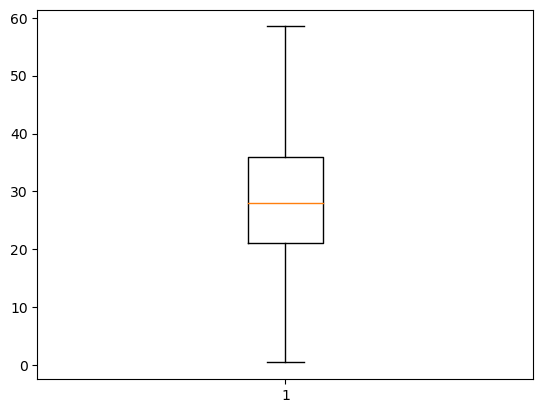

In [29]:
plt.boxplot(df['Age'])
plt.show()

In [30]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [32]:
X_train

Pclass    Age     Fare  Sex_male  Embarked_Q  Embarked_S
680       3  28.00   8.1375         0           1           0
467       1  56.00  26.5500         1           0           1
341       1  24.00  73.8625         0           0           1
657       3  32.00  15.5000         0           1           0
506       2  33.00  26.0000         0           0           1
..      ...    ...      ...       ...         ...         ...
469       3   0.75  19.2583         0           0           0
130       3  33.00   7.8958         1           0           0
406       3  51.00   7.7500         1           0           1
49        3  18.00  17.8000         0           0           1
226       2  19.00  10.5000         1           0           1

[612 rows x 6 columns]

In [33]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
ypred_train = model2.predict(X_train)
ypred_test = model2.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score',cross_val_score(model2,X,y,cv=5).mean())

Training Accuracy: 0.9754901960784313
Test Accuracy: 0.7012987012987013
Cross Validation Score 0.7337832102537984


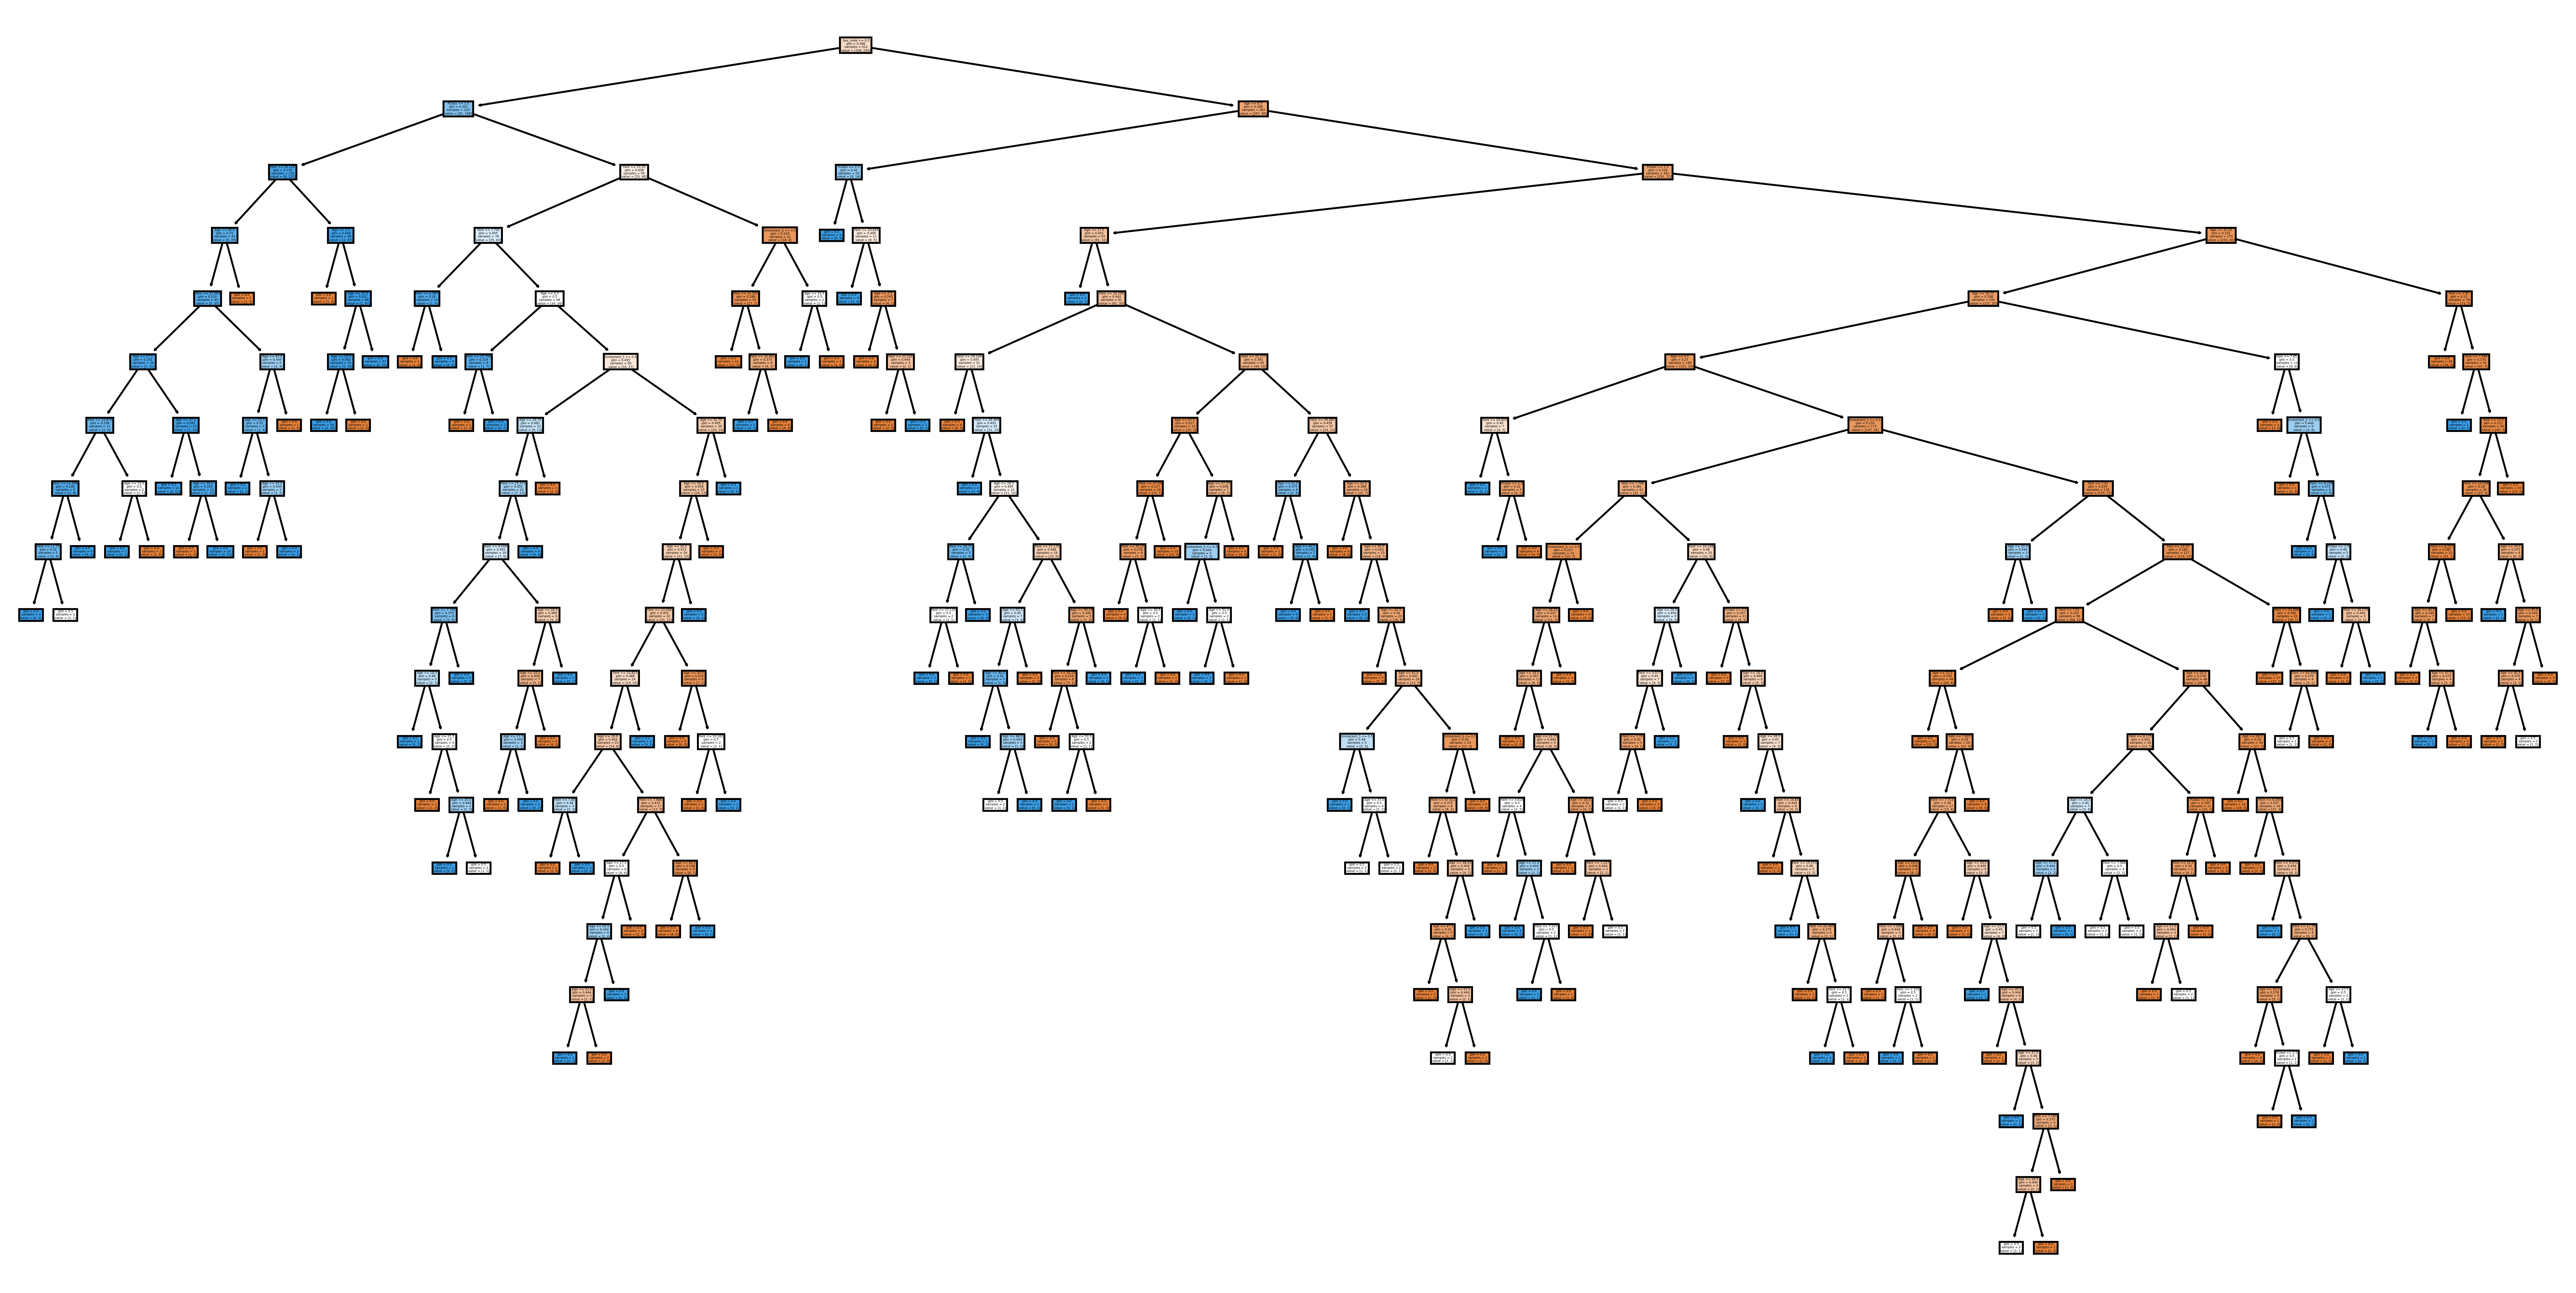

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)
plot_tree(model2,filled=True,feature_names=X.columns)
plt.show()

In [35]:
model2.feature_importances_
pd.DataFrame(index=X.columns,data=model2.feature_importances_,columns = ['Feature Importance'])

Feature Importance
Pclass                0.134637
Age                   0.300586
Fare                  0.280823
Sex_male              0.263261
Embarked_Q            0.003782
Embarked_S            0.016911

In [36]:
from sklearn.model_selection import GridSearchCV 
#model
estimator = DecisionTreeClassifier(random_state=0)

# Parameters (which you want to tune and identify the best)
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': list(range(1,20))}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [37]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [38]:
X = X.drop(['Embarked_Q','Embarked_S'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
model2.fit(X_train,y_train)
ypred_train = model2.predict(X_train)
ypred_test = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross validation Score:',cross_val_score(model2,X,y,cv=5).mean())

Training Accuracy: 0.8562091503267973
Test Accuracy: 0.7922077922077922
Cross validation Score: 0.7833375774552245


In [39]:
df['Fare'].skew()

1.0984687270303022

In [41]:
from scipy.stats import boxcox
df['Fare'],param = boxcox(df['Fare']+0.0001)

In [42]:
df['Fare'].skew()

0.09300722061612626

In [43]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [45]:
X_train

Pclass    Age      Fare  Sex_male  Embarked_Q  Embarked_S
680       3  28.00  2.938861         0           1           0
467       1  56.00  5.644500         1           0           1
341       1  24.00  8.920409         0           0           1
657       3  32.00  4.291443         0           1           0
506       2  33.00  5.587603         0           0           1
..      ...    ...       ...       ...         ...         ...
469       3   0.75  4.810607         0           0           0
130       3  33.00  2.881865         1           0           0
406       3  51.00  2.846896         1           0           1
49        3  18.00  4.618307         0           0           1
226       2  19.00  3.442279         1           0           1

[612 rows x 6 columns]

In [47]:
model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_train,y_train)
ypred_train = model3.predict(X_train)
ypred_test = model3.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score:',cross_val_score(model3,X,y,cv=5).mean())

Training Accuracy: 0.9754901960784313
Test Accuracy: 0.7012987012987013
Cross Validation Score: 0.7324760207113148


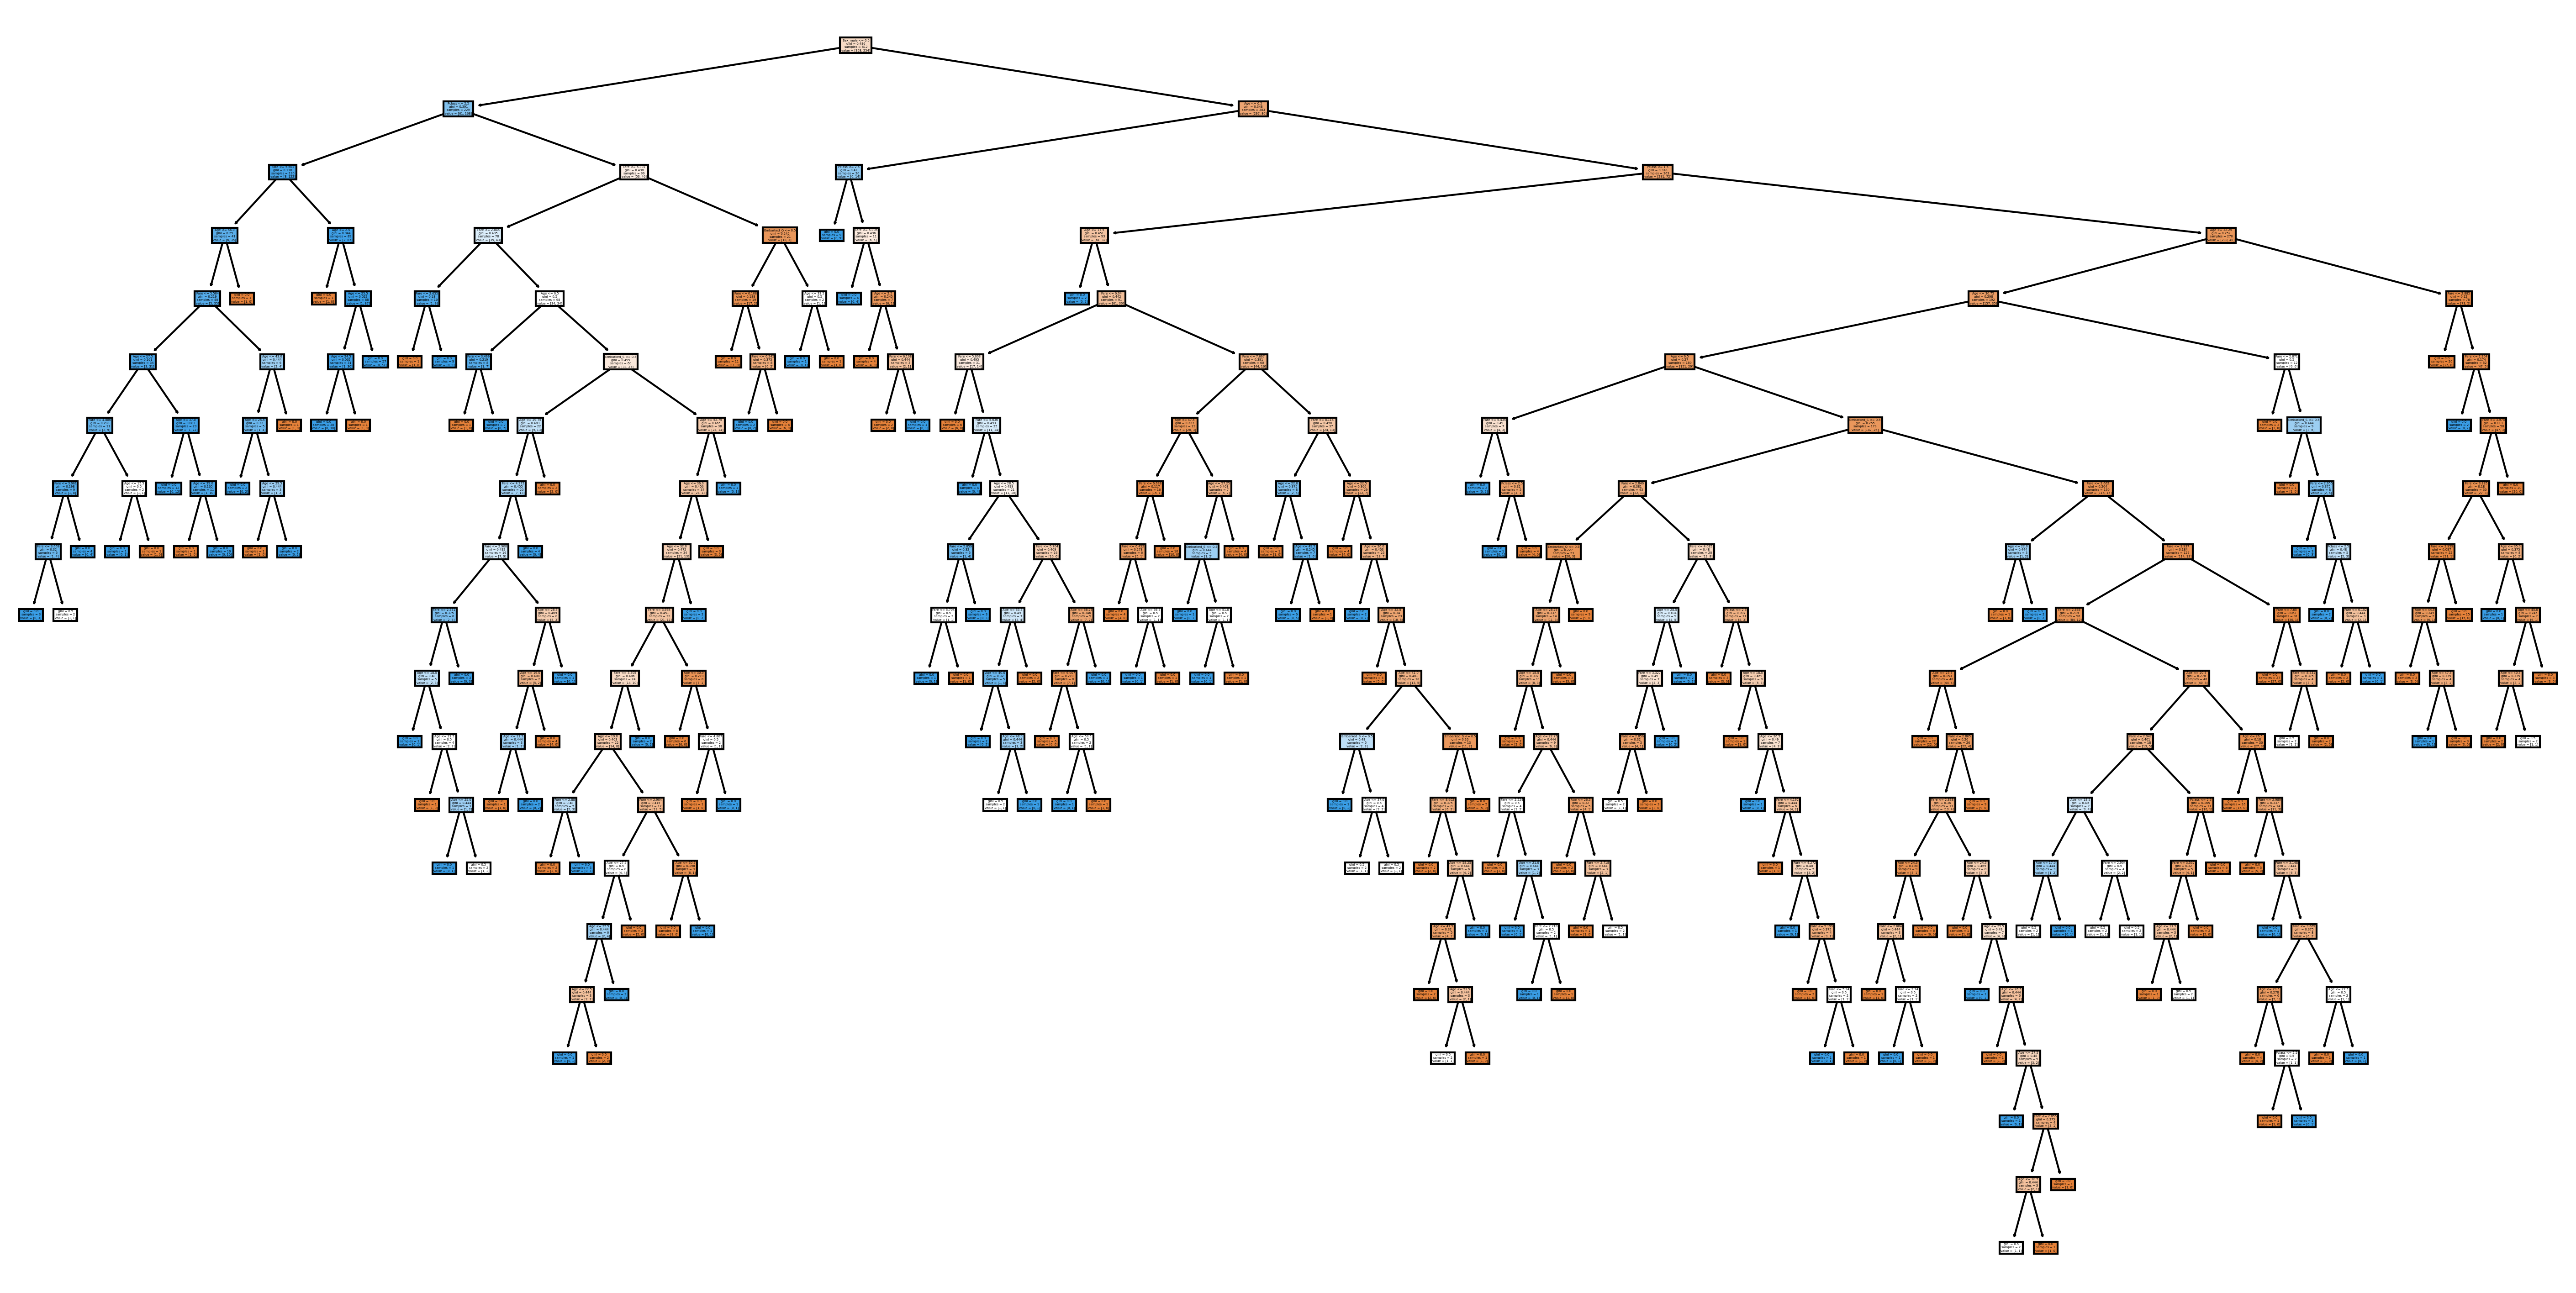

In [48]:
plt.figure(figsize=(24,12),dpi=300)
plot_tree(model3,filled=True,feature_names=X.columns)
plt.show()

In [49]:
pd.DataFrame(index=X.columns,data=model3.feature_importances_,columns=['Feature Importances'])

Feature Importances
Pclass                 0.134637
Age                    0.300586
Fare                   0.280823
Sex_male               0.263261
Embarked_Q             0.003782
Embarked_S             0.016911

In [50]:
estimator = DecisionTreeClassifier(random_state=0)

# Parameters (which you want to tune and identify the best)
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': list(range(1,20))}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [51]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [53]:
X = X.drop(['Embarked_Q','Embarked_S'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

model3 = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
model3.fit(X_train,y_train)
ypred_train = model3.predict(X_train)
ypred_test = model3.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross validation Score',cross_val_score(model3,X,y,cv=5).mean())

Training Accuracy: 0.8562091503267973
Test Accuracy: 0.7922077922077922
Cross validation Score 0.7833375774552245


In [54]:
df

Survived  Pclass   Age      Fare  Sex_male  Embarked_Q  Embarked_S
0           0       3  22.0  2.723388         1           0           1
1           1       1  38.0  8.788591         0           0           0
2           1       3  26.0  2.888815         0           0           1
3           1       1  35.0  7.749856         0           0           1
4           0       3  35.0  2.918365         1           0           1
..        ...     ...   ...       ...       ...         ...         ...
885         0       3  39.0  5.900513         0           1           0
887         1       1  19.0  5.983921         0           0           1
888         0       3  28.0  5.312300         0           0           1
889         1       1  26.0  5.983921         1           0           0
890         0       3  32.0  2.846896         1           1           0

[766 rows x 7 columns]

In [55]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [57]:
X_train

Pclass    Age      Fare  Sex_male  Embarked_Q  Embarked_S
680       3  28.00  2.938861         0           1           0
467       1  56.00  5.644500         1           0           1
341       1  24.00  8.920409         0           0           1
657       3  32.00  4.291443         0           1           0
506       2  33.00  5.587603         0           0           1
..      ...    ...       ...       ...         ...         ...
469       3   0.75  4.810607         0           0           0
130       3  33.00  2.881865         1           0           0
406       3  51.00  2.846896         1           0           1
49        3  18.00  4.618307         0           0           1
226       2  19.00  3.442279         1           0           1

[612 rows x 6 columns]

In [58]:
model4 = DecisionTreeClassifier(random_state=0)
model4.fit(X_train,y_train)
ypred_train = model4.predict(X_train)
ypred_test = model4.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score:',cross_val_score(model4,X,y,cv=5).mean())

Training Accuracy: 0.9754901960784313
Test Accuracy: 0.7012987012987013
Cross Validation Score: 0.7324760207113148


<Figure size 7200x3600 with 0 Axes>

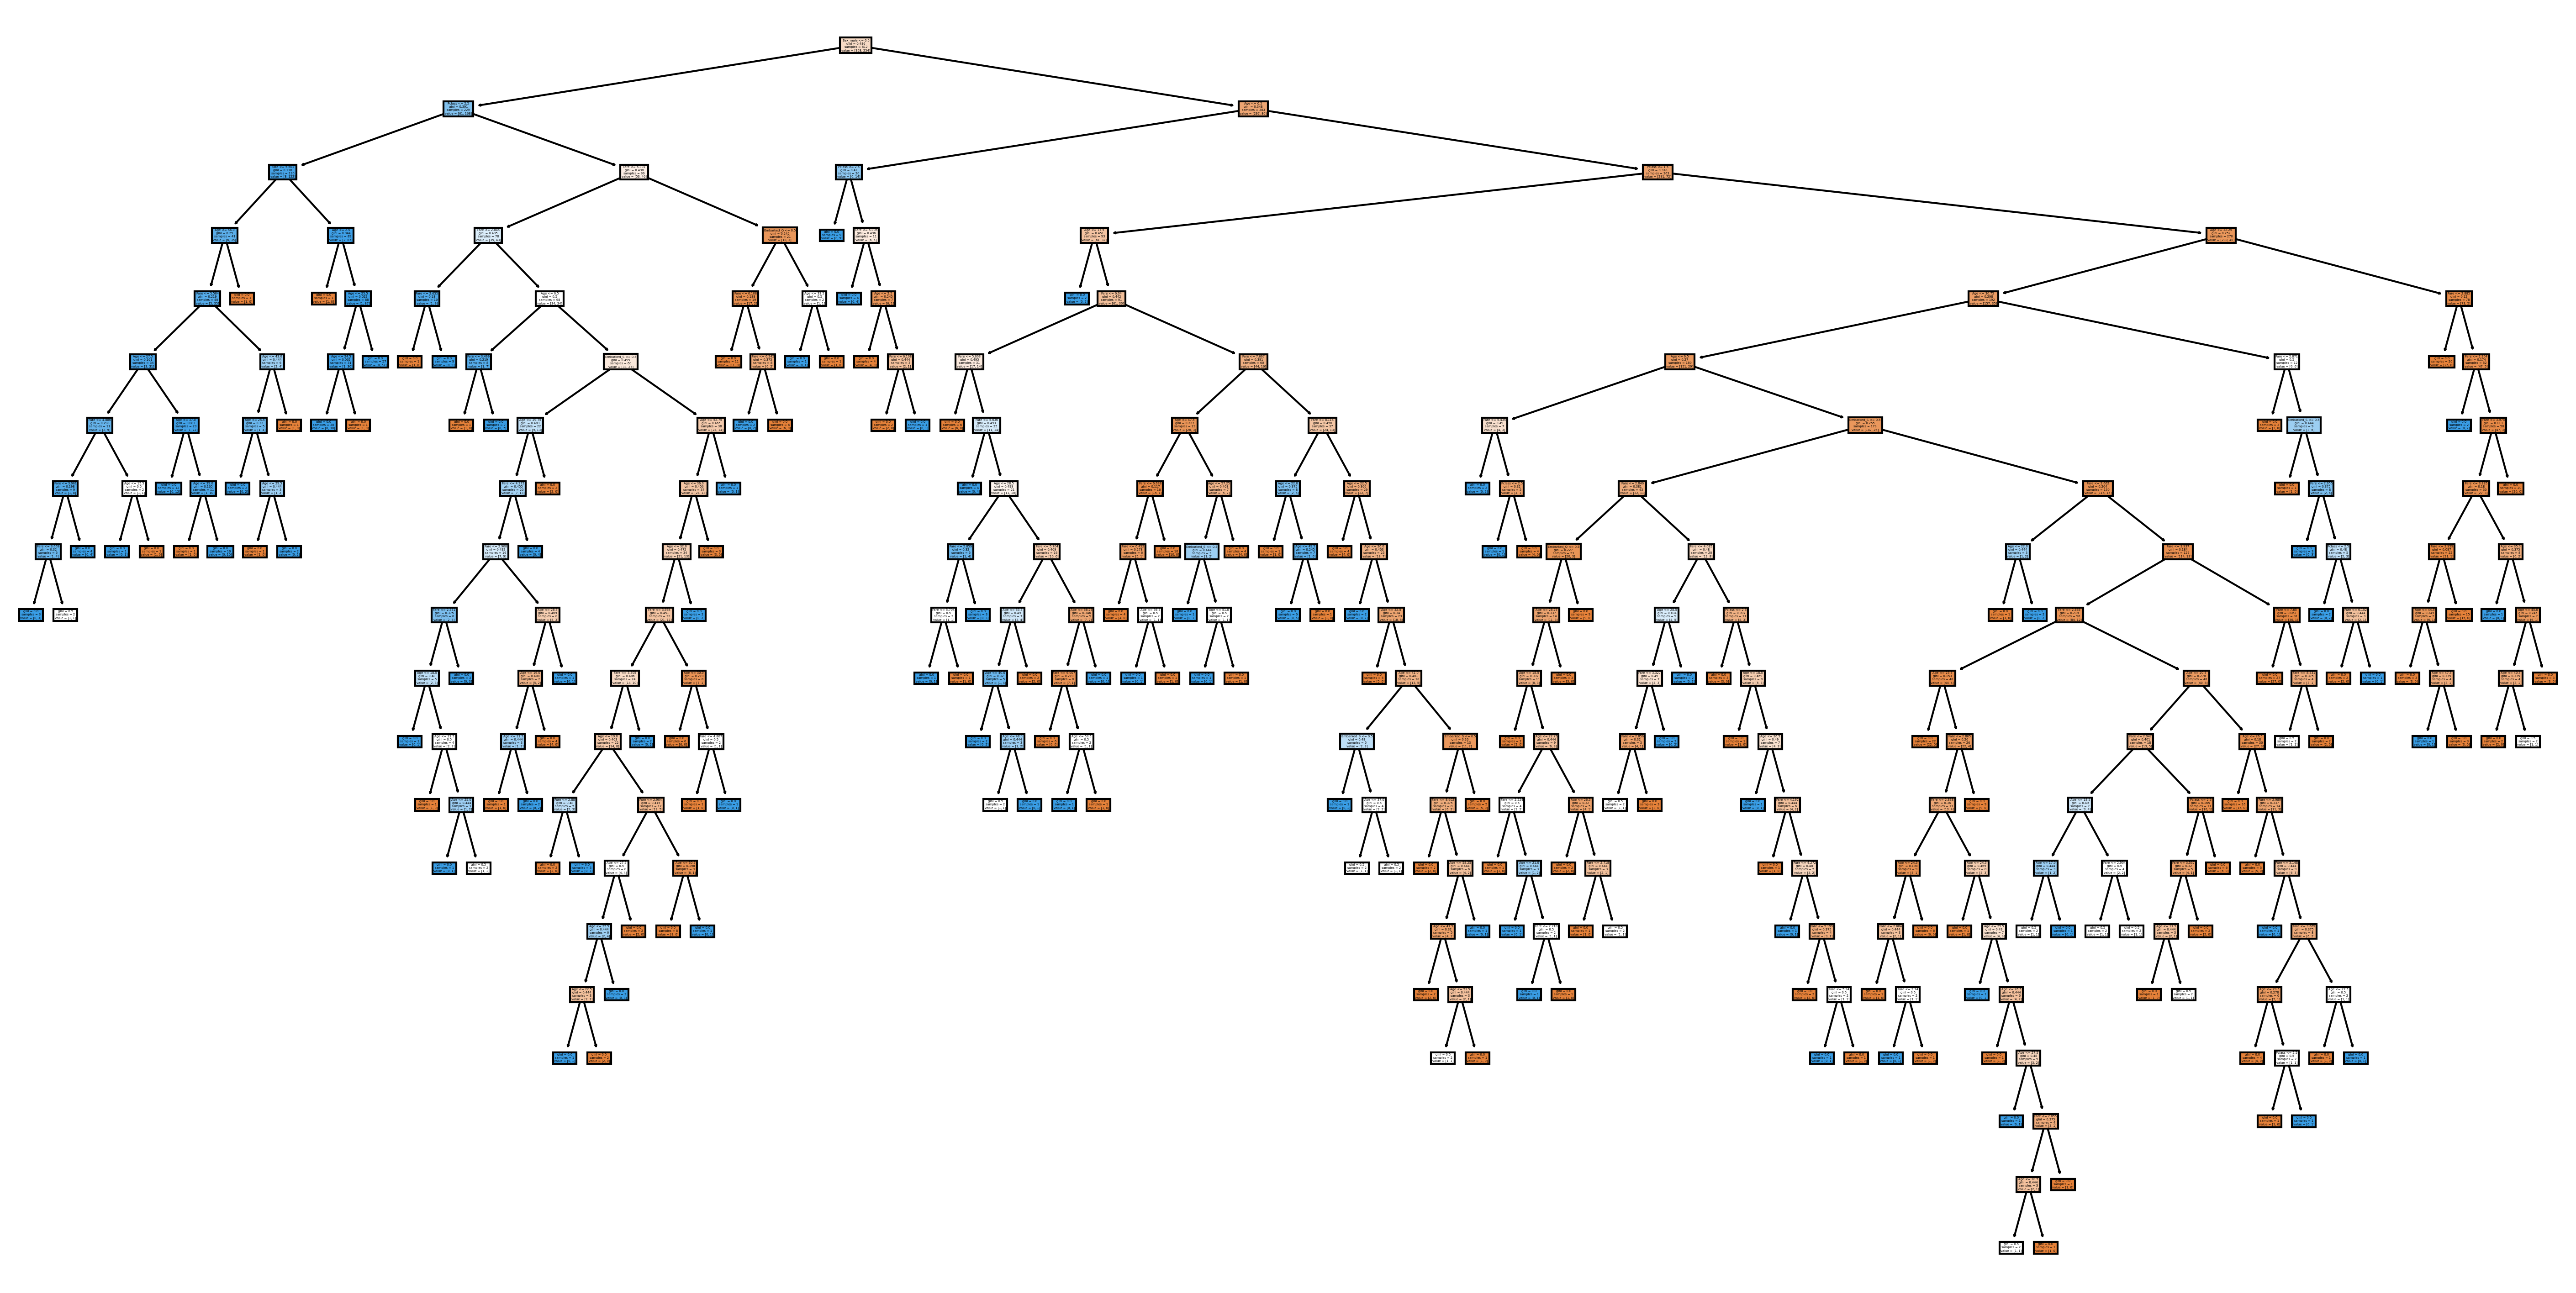

In [62]:
plt.figure(figsize=(24,12),dpi=300)
plot_tree(model4,filled=True,feature_names=X.columns)
plt.show()

In [63]:
model4.feature_importances_

array([0.13463683, 0.30058584, 0.28082331, 0.26326102, 0.00378155,
       0.01691145])

In [64]:
pd.DataFrame(index=X.columns,data=model4.feature_importances_,columns=['Feature Importance'])

Feature Importance
Pclass                0.134637
Age                   0.300586
Fare                  0.280823
Sex_male              0.263261
Embarked_Q            0.003782
Embarked_S            0.016911

In [65]:
estimator = DecisionTreeClassifier(random_state=0)

# Parameters (which you want to tune and identify the best)
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': list(range(1,20))}

grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [66]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [67]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
model4.fit(X_train,y_train)
ypred_train = model4.predict(X_train)
ypred_test = model4.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score:',cross_val_score(model4,X,y,cv=5).mean())

Training Accuracy: 0.8545751633986928
Test Accuracy: 0.7987012987012987
Cross Validation Score: 0.7820388761565231
